In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('glassdoor_jobs.csv')
df.head()

,job_title,salary_estimate,job_description,rating,company_name,location,job_age,size,founded,type_of_ownership,...,max_salary,avg_salary,company_age,python_yn,r_yn,spark_yn,aws_yn,pytorch_yn,tf_yn,ml_yn
0,"JUNIOR DATA SCIENTIST - Dubai, UAE",-1,"Location: Dubai, UAE (We provide visa sponsors...",-1.0,"Cobblestone Energy, Dubai - UAE.",Sharjah,30d+,-1,-1,-1,...,60000.0,60000.0,-1,0,0,0,0,0,0,0
1,"SENIOR DATA SCIENTIST - Dubai, UAE",-1,Employment type: Full-time & Permanent\nReport...,5.0,Cobblestone\n5.0,Dubai,10d,1 to 50 Employees,-1,Company - Private,...,150000.0,115000.0,-1,0,0,0,0,0,0,0
2,Research Scientist,AED 20K - AED 25K (Employer est.),Research Scientist Position Description\nGener...,3.6,Khalifa University\n3.6,Abu Dhabi,24h,501 to 1000 Employees,2007,College / University,...,25000.0,22500.0,16,0,0,0,0,0,0,0
3,Senior Data Scientist - Remote,AED 32K - AED 40K (Employer est.),"Launched in 2019, Binance.US is the fastest gr...",3.5,Binance.us\n3.5,Dubai,30d+,501 to 1000 Employees,2019,Company - Private,...,40000.0,36000.0,4,0,0,0,0,0,0,0
4,Senior Data Scientist,-1,"Senior Data Scientist - Onsite - Dubai, UAE - ...",-1.0,Databuzz Ltd,Dubai,23d,Unknown,-1,Company - Public,...,200000.0,200000.0,-1,0,0,0,0,0,0,0


In [23]:
# # add experience level column
df['experience_level'] = df['job_title'].apply(lambda x: \
            'junior' if 'junior' in x.lower() or 'jr' in x.lower() else 'senior' if 'senior' in x.lower() or 'expert' in x.lower()\
                or 'lead' in x.lower() or 'principal' in x.lower()  else 'na')
df['experience_level'].value_counts()

na        24
senior     8
junior     3
Name: experience_level, dtype: int64

In [84]:
# # add job simplified column
df['job_simp'] = df['job_title'].apply(lambda x: \
            'analyst' if 'analyst' in x.lower() else 'data engineer' if 'data engineer' in x.lower() else 'data scientist' if 'data scientist' in x.lower()\
                else 'director' if 'director' in x.lower() else 'manager' if 'manager' in x.lower() else 'machine learning engineer' if \
                    'machine learning engineer' in x.lower() else 'researcher' if 'research' in x.lower() else 'other')
df['job_simp'].value_counts()

analyst                      19
data scientist                7
other                         7
researcher                    1
machine learning engineer     1
Name: job_simp, dtype: int64

In [24]:
# convert salary into monthly salary
df['min_salary'] = df.apply(lambda x: x.min_salary * 160 if x.hourly==1 else x.min_salary/12 if x.annually==1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary * 160 if x.hourly==1 else x.max_salary/12 if x.annually==1 else x.max_salary, axis=1)
df['avg_salary'] = df.apply(lambda x: x.avg_salary * 160 if x.hourly==1 else x.avg_salary/12 if x.annually==1 else x.avg_salary, axis=1)

# convert USD to AED
df['min_salary'] = df.apply(lambda x: x.min_salary * 2.51 if x.currency=='usd' else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary * 2.51 if x.currency=='usd' else x.max_salary, axis=1)
df['avg_salary'] = df.apply(lambda x: x.avg_salary * 2.51 if x.currency=='usd' else x.avg_salary, axis=1)

# add job description length column
df['desc_len'] = df.job_description.apply(lambda x: len(x))

# remove new line character and rating from company name
df['company_name'] = df['company_name'].apply(lambda x: x.split('\n')[0] if len(x.split('\n'))>1 else x)

# add column indicating if a job was posted more than 30 days ago
df['older_than_30_days'] = df['job_age'].apply(lambda x: 1 if '30' in x.lower() else 0)

In [53]:
df[['python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'pytorch_yn', 'tf_yn', 'ml_yn']].sum()

python_yn     2
r_yn          0
spark_yn      0
aws_yn        1
pytorch_yn    0
tf_yn         1
ml_yn         5
dtype: int64

In [ ]:
# df.drop(columns=['salary_estimate', ])

In [26]:
df.describe()

,rating,founded,competitors,hourly,annually,min_salary,max_salary,avg_salary,company_age,python_yn,r_yn,spark_yn,aws_yn,pytorch_yn,tf_yn,ml_yn,desc_len
count,35.000000,35.000000,35.0,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0,35.0,35.000000,35.0,35.000000,35.000000,35.000000
mean,1.457143,229.400000,-1.0,0.057143,0.171429,15057.095238,18257.571429,16657.333333,0.028571,0.057143,0.0,0.0,0.028571,0.0,0.028571,0.142857,618.485714
std,2.478767,650.772536,0.0,0.235504,0.382385,11665.600885,13308.752706,12214.373852,3.320929,0.235504,0.0,0.0,0.169031,0.0,0.169031,0.355036,287.970420
min,-1.000000,-1.000000,-1.0,0.000000,0.000000,2000.000000,2000.000000,2000.000000,-1.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,322.000000
25%,-1.000000,-1.000000,-1.0,0.000000,0.000000,5000.000000,6000.000000,5500.000000,-1.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,432.000000
50%,3.100000,-1.000000,-1.0,0.000000,0.000000,12550.000000,13000.000000,12550.000000,-1.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,547.000000
75%,3.500000,-1.000000,-1.0,0.000000,0.000000,20458.333333,27500.000000,24027.083333,-1.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,743.000000
max,5.000000,2019.000000,-1.0,1.000000,1.000000,50000.000000,50000.000000,50000.000000,16.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,1739.000000


<AxesSubplot:>

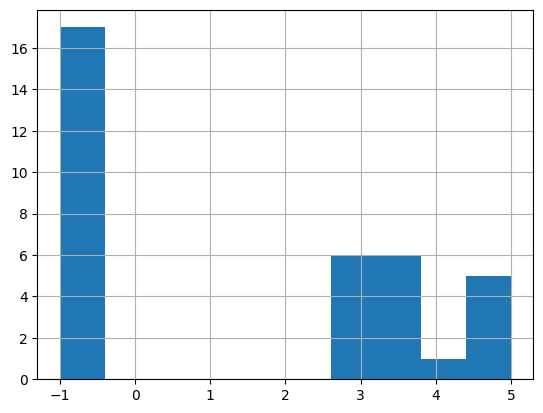

In [30]:
df.rating.hist()

<AxesSubplot:>

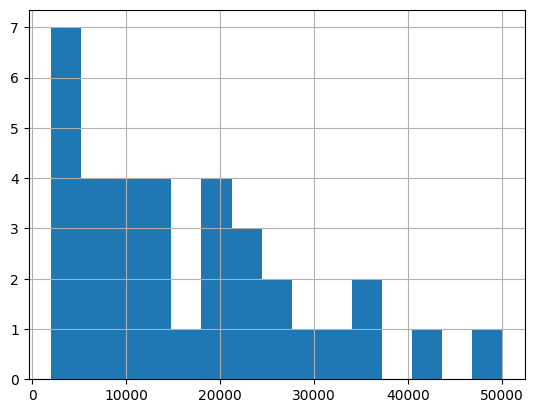

In [34]:
df.avg_salary.hist(bins=15)

<AxesSubplot:>

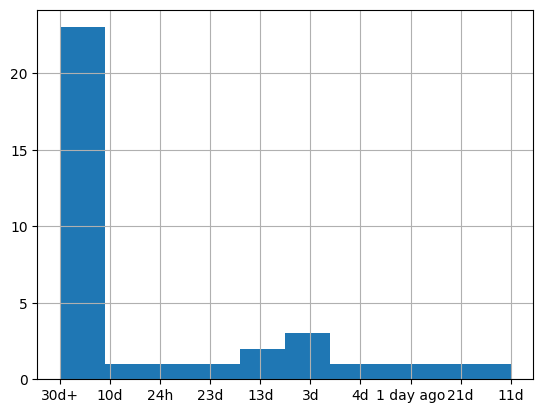

In [35]:
df.job_age.hist()

<AxesSubplot:>

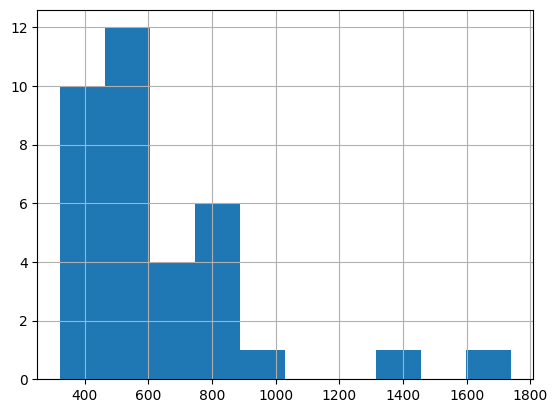

In [36]:
df.desc_len.hist()

<AxesSubplot:>

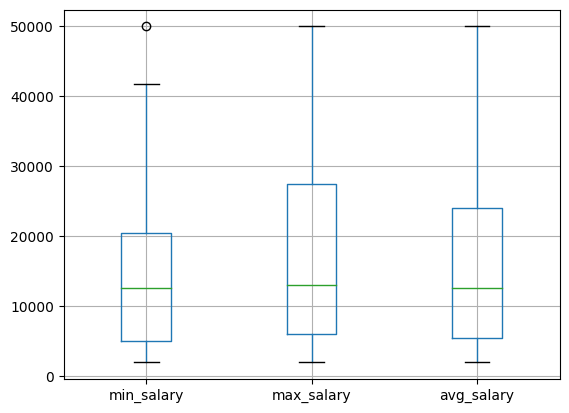

In [38]:
# see salary boxplots
df.boxplot(column=['min_salary', 'max_salary', 'avg_salary'])

<AxesSubplot:>

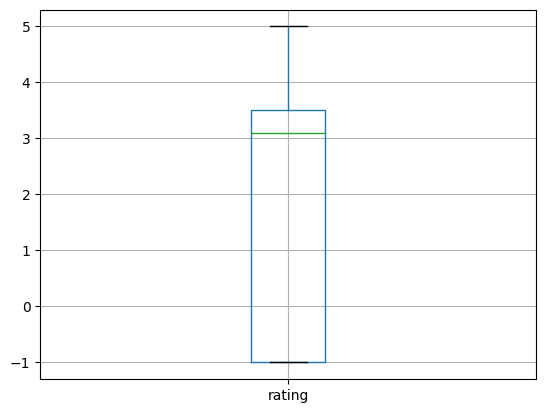

In [39]:
df.boxplot(column=['rating'])

<AxesSubplot:>

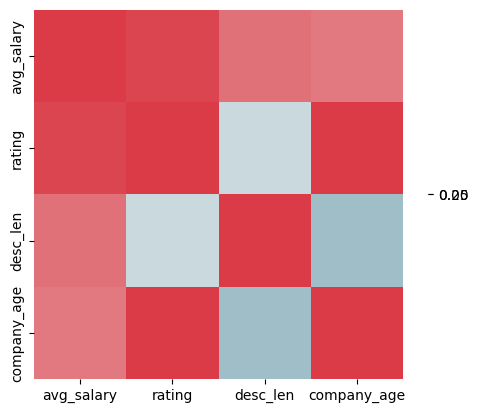

In [47]:
corr = df[[ 'avg_salary', 'rating', 'desc_len', 'company_age']].corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, vmax=.3, center=0, cmap=cmap, square=True, linewidths=.0, cbar_kws={"shrink":.0})

In [58]:
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'job_age', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'date_scrapped', 'job_fam', 'salary_description', 'hourly', 'annually',
       'salary', 'currency', 'min_salary', 'max_salary', 'avg_salary',
       'company_age', 'python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'pytorch_yn',
       'tf_yn', 'ml_yn', 'experience_level', 'desc_len'],
      dtype='object')

location: total = 3


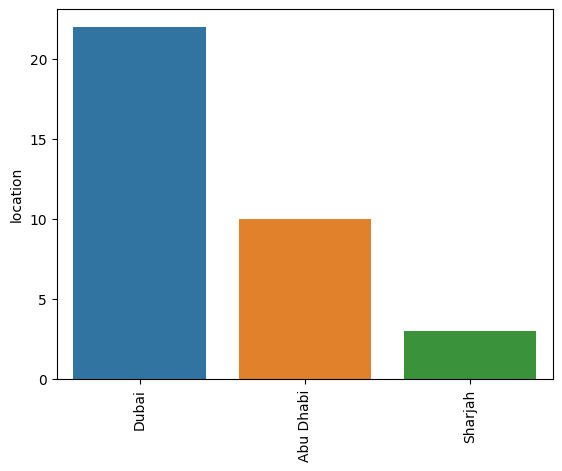

size: total = 7


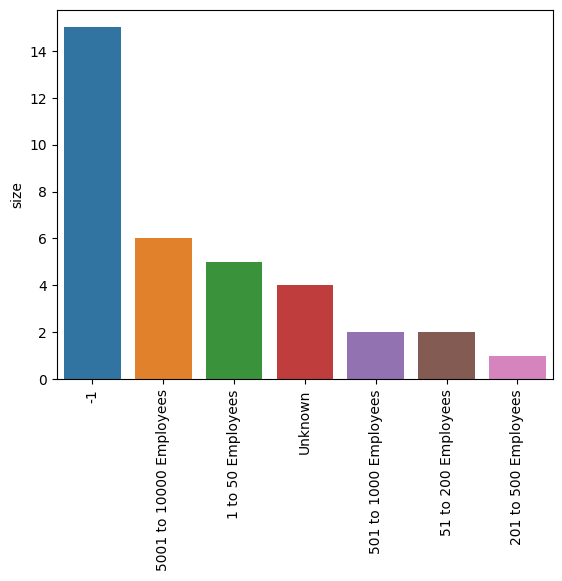

type_of_ownership: total = 5


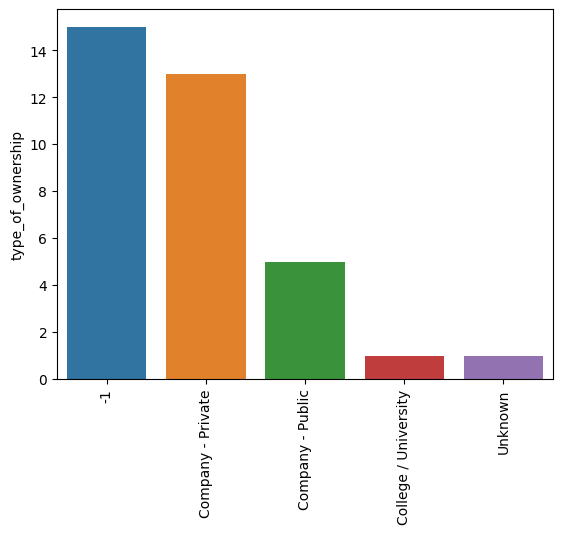

revenue: total = 4


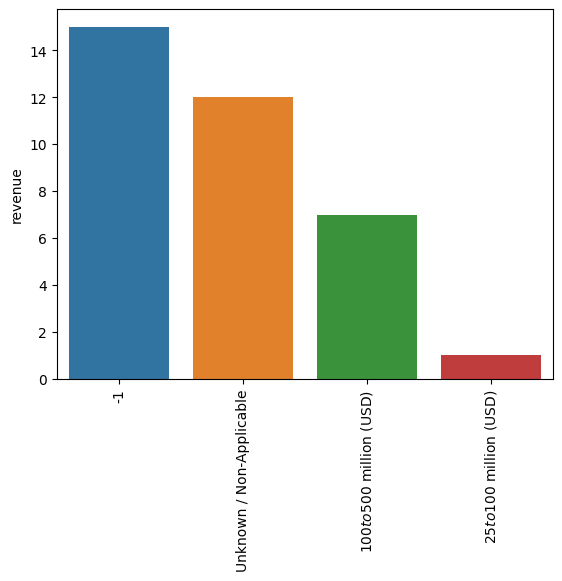

job_fam: total = 4


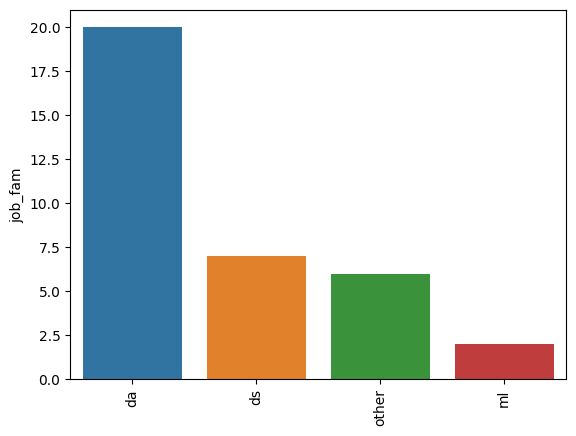

job_simp: total = 5


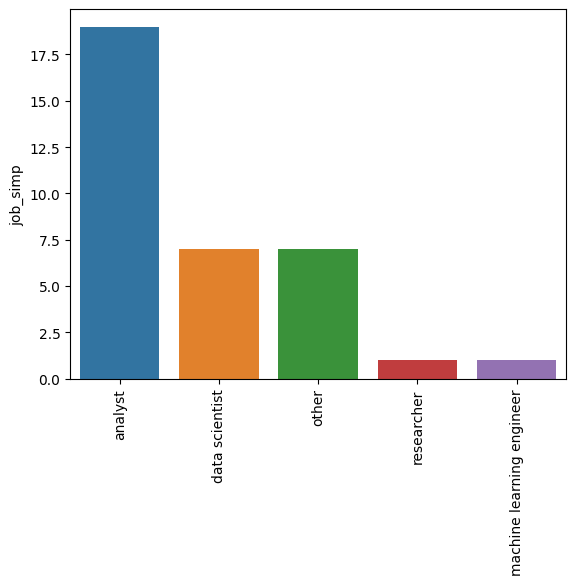

ml_yn: total = 2


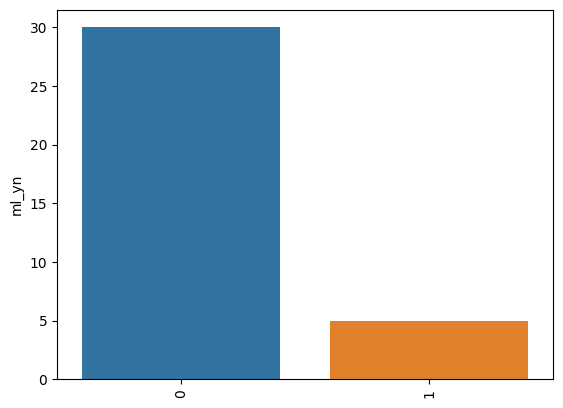

experience_level: total = 3


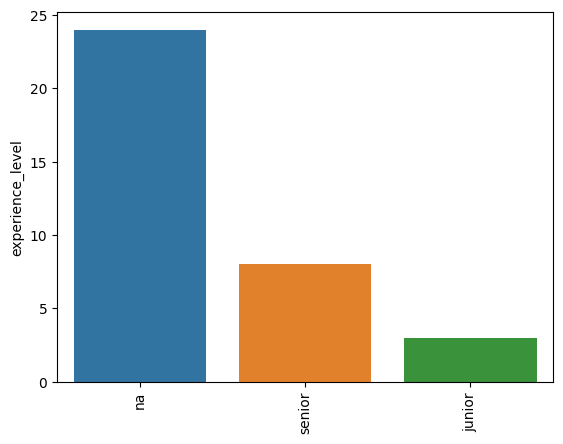

industry: total = 5


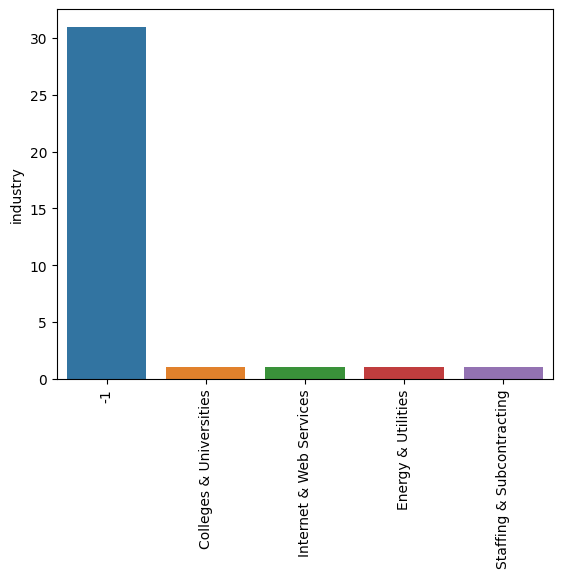

company_name: total = 27


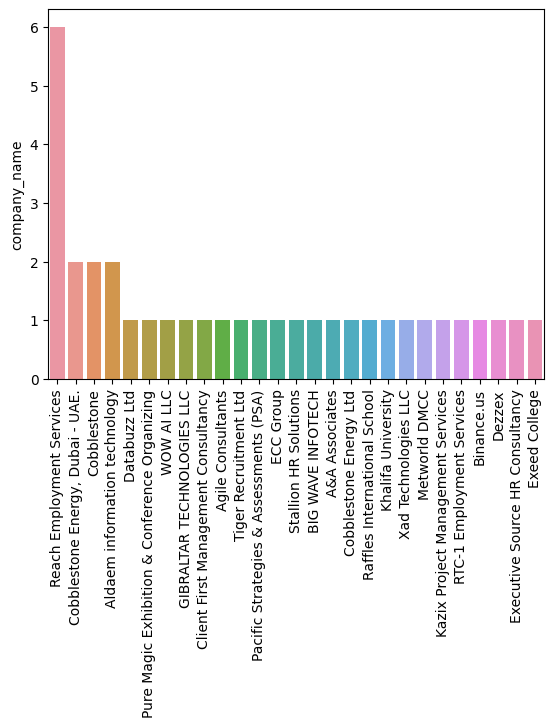

In [85]:
df_cat = df[['location', 'size', 'type_of_ownership', 'revenue', 'job_fam', 'job_simp', 'ml_yn', 'experience_level', 'industry', 'company_name']]

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("{}: total = {}".format(i, len(cat_num)))
    plot = sns.barplot(x=cat_num.index, y=cat_num)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
    plt.show()

In [76]:
pd.pivot_table(df, index='job_fam', values='avg_salary')

,avg_salary
job_fam,
da,11827.500000
ds,30345.238095
ml,15000.000000
other,17340.000000


In [86]:
pd.pivot_table(df, index=['job_simp', 'experience_level'], values='avg_salary')

avg_salary
job_simp                  experience_level              
analyst                   junior            20025.000000
                          na                 8617.647059
data scientist            junior            12550.000000
                          na                30000.000000
                          senior            33973.333333
machine learning engineer na                20000.000000
other                     na                14135.000000
                          senior            28333.333333
researcher                na                22500.000000

In [90]:
pd.pivot_table(df, index=['location', 'job_simp'], values='avg_salary').sort_values('location', ascending=False)

avg_salary
location  job_simp                               
Sharjah   analyst                    12550.000000
          data scientist             12550.000000
          other                      24000.000000
Dubai     analyst                     8500.000000
          data scientist             33311.111111
          machine learning engineer  20000.000000
          other                       6270.000000
Abu Dhabi analyst                    12700.000000
          other                      26250.000000
          researcher                 22500.000000

In [100]:
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'job_age', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'date_scrapped', 'job_fam', 'salary_description', 'hourly', 'annually',
       'salary', 'currency', 'min_salary', 'max_salary', 'avg_salary',
       'company_age', 'python_yn', 'r_yn', 'spark_yn', 'aws_yn', 'pytorch_yn',
       'tf_yn', 'ml_yn', 'experience_level', 'desc_len', 'job_simp',
       'older_than_30_days'],
      dtype='object')

In [110]:
# rating, industry, revenue, job_fam, job_simp, experience_level, ml_yn, size, job_age, type_of_ownership, desc_len

df_pivots = df[['avg_salary', 'rating', 'industry', 'revenue', 'job_fam', 'job_simp', 'experience_level', 'ml_yn', 'size', \
                 'type_of_ownership', 'older_than_30_days']]

for i in df_pivots.drop(columns=['avg_salary']).columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values('avg_salary', ascending=False))

rating
          avg_salary
rating              
 3.8    31375.000000
 4.6    27500.000000
 3.6    26250.000000
 5.0    23052.777778
 3.1    17666.666667
 3.5    14125.000000
-1.0    13380.784314
 4.8    12500.000000
industry
                             avg_salary
industry                               
Internet & Web Services    36000.000000
Energy & Utilities         31375.000000
Colleges & Universities    22500.000000
-1                         15504.247312
Staffing & Subcontracting  12500.000000
revenue
                              avg_salary
revenue                                 
Unknown / Non-Applicable    23165.972222
$100 to $500 million (USD)  19625.000000
-1                          11042.666667
$25 to $100 million (USD)    2000.000000
job_fam
           avg_salary
job_fam              
ds       30345.238095
other    17340.000000
ml       15000.000000
da       11827.500000
job_simp
                             avg_salary
job_simp                               
data scient

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
# nltk.download('stopwords')
# nltk.download('words')
nltk.download('all')

In [146]:
eng_words = set(nltk.corpus.words.words())
eng_words = set(nltk.corpus.words.words())
words = ' '.join(df['job_description'])
words = [x.lower() for x in words.split() if x.lower() in eng_words]
words = ' '.join(words)

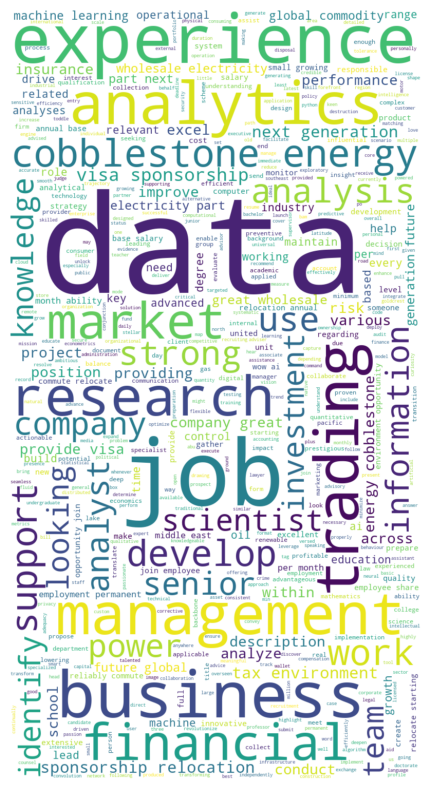

In [148]:
def punctuation_stop(text):
    # remove punctuation and stop words
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)
text = ' '.join([ele for ele in words_filtered])

wc = WordCloud(background_color='white', random_state=1, stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()